In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.model_selection.validation import cross_validate
from surprise.model_selection import train_test_split
from surprise.model_selection import KFold
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from surprise.prediction_algorithms.matrix_factorization import NMF,SVD

In [29]:
dataset = pd.read_csv('ratings.csv')

### Question 1

In [12]:
sparsity = dataset.shape[0]/(dataset['movieId'].nunique() * dataset['userId'].nunique())

In [13]:
print(sparsity)

0.016439141608663475


### Question 2

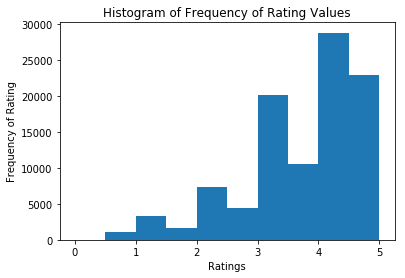

In [14]:
plt.hist(dataset['rating'],bins=np.arange(0, 5 + 0.5, 0.5))
plt.title('Histogram of Frequency of Rating Values')
plt.xlabel('Ratings')
plt.ylabel('Frequency of Rating')
plt.show()

### Question 3

In [15]:
movie_ids = dataset['movieId']
movie_ratings_dict = dict(Counter(movie_ids))

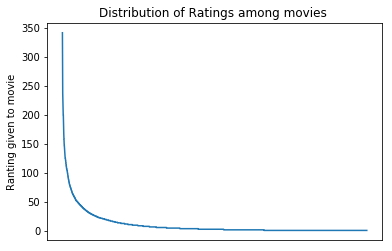

In [16]:
plt.plot(range(0,len(movie_ratings_dict.keys())), sorted(movie_ratings_dict.values(),reverse=True))
plt.title('Distribution of Ratings among movies ')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')
plt.ylabel('Ranting given to movie')
plt.show()

### Question 4

In [41]:
user_ids = dataset['userId']
user_ratings_dict = dict(Counter(user_ids))

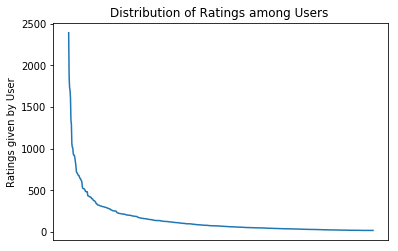

In [19]:
plt.plot(range(0,len(user_ratings_dict.keys())), sorted(user_ratings_dict.values(),reverse=True))
plt.title('Distribution of Ratings among Users ')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')
plt.ylabel('Ratings given by User')
plt.show()

### Question 5

In [20]:
sum(sorted(user_ratings_dict.values(),reverse=True)[:100])

55141

### Question 6

In [22]:
id_var = (dataset[['movieId','rating']].groupby('movieId',as_index=False)).var().fillna(0)
id_var_dict = dict(zip(list(id_var['movieId']), id_var['rating']))
var_list = list(dataset[['movieId','rating']].groupby('movieId').var()['rating'])

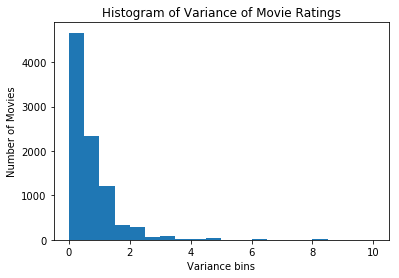

In [13]:
plt.hist(np.nan_to_num(var_list),bins=np.arange(min(var_list), max(var_list), 0.5))
plt.title('Histogram of Variance of Movie Ratings')
plt.ylabel('Number of Movies')
plt.xlabel('Variance bins')
plt.show()


In [14]:
def get_popular(movie_ratings_dict, testset):
    movieids = [x[0] for x in movie_ratings_dict.items() if x[1]>2]
    return [x for x in testset if x[1] in movie_ids]
def get_unpopular(movie_ratings_dict, testset):
    movieids = [x[0] for x in movie_ratings_dict.items() if x[1]<=2]
    return [x for x in testset if x[1] in movie_ids]

def get_highvar(movie_ratings_dict, var_dict, testset):
    movieids = [x[0] for x in movie_ratings_dict.items() if x[1]>=5]
    movieids = [x for x in movieids if var_dict[x]>=2 ]
    return [x for x in testset if x[1] in movie_ids]
    

## 4.5 k-NN Collaborative Filtering

In [15]:
def do_kFold(data_, range_,trimm,movie_ratings_dict,splits=10, id_var_dict=None):
    sim_options = {'name': 'pearson_baseline'}
    kf = KFold(n_splits=splits)
    reader = Reader(rating_scale=(1, 5))
    mae_d={}
    rmse_d={}
    for neigh in range_:
        print('Neighbors ',neigh)
        knn_model = KNNWithMeans( k=neigh, sim_options= sim_options)
        rmse_list=[]
        mae_list =[]
        #print(data_.)
        for trainset, testset in kf.split(data_):
            #print(testset)
            if(trimm=='p'):
                testset = get_popular(movie_ratings_dict,testset)
            elif(trimm=='up'):
                testset = get_unpopular(movie_ratings_dict,testset)
            elif(trimm=='hv'):
                testset = get_highvar(movie_ratings_dict,id_var_dict,testset)
            knn_model.fit(trainset)
            predictions = knn_model.test(testset,verbose=False)
            rmse_list.append(accuracy.rmse(predictions,verbose=False))
            mae_list.append(accuracy.mae(predictions,verbose=False))
        rmse_d[neigh]=sum(rmse_list)/len(rmse_list)
        mae_d[neigh]=sum(mae_list)/len(mae_list)
        print('Mean rmse',sum(rmse_list)/len(rmse_list))
        print('Mean mae',sum(mae_list)/len(mae_list))
    return rmse_d, mae_d



In [16]:
def rmse_mae_plot(rmse_d,mae_d):
    plt.plot(list(rmse_d.keys()),list(rmse_d.values()))
    plt.show()
    plt.plot(list(mae_d.keys()),list(mae_d.values()))
    plt.show()

### Question 10

In [170]:
total_data = Dataset.load_from_df(dataset[['userId','movieId','rating']], reader)
r_d,m_d = do_kFold(total_data, range(2,101,2),'notrim',movie_ratings_dict)#TODO use 2 instead of 8. 8 is used to compute faster

Neighbors  2
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearso

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.91857346622
Mean mae 0.696952952828
Neighbors  16
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Es

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.915352450332
Mean mae 0.694093153435
Neighbors  30
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
C

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.915316771062
Mean mae 0.69459700979
Neighbors  56
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Es

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.916841683892
Mean mae 0.695690061325
Neighbors  70
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
D

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.914527391606
Mean mae 0.694420219417
Neighbors  96
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
E

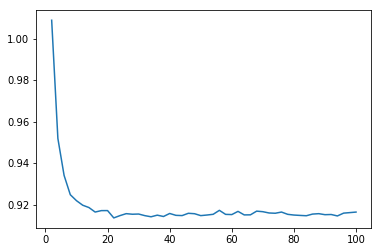

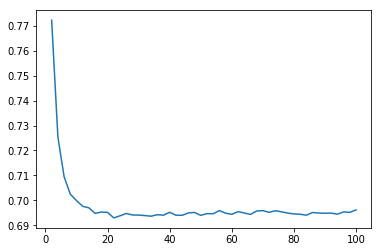

In [171]:
rmse_mae_plot(r_d,m_d)

### Question 11

 k value =20


 RMSE = 0.9146735

### Question 12,13,14

In [178]:
rp_d, mp_d = do_kFold(total_data, range(2,101,2),'p',movie_ratings_dict)#TODO use 2 instead of 8. 8 is used to compute faster
rup_d,mup_d =do_kFold(total_data, range(2,101,2),'up',movie_ratings_dict)#TODO use 2 instead of 8. 8 is used to compute faster
rhv_d,mhv_d =do_kFold(total_data, range(2,101,2),'p',movie_ratings_dict,id_var_dict= id_var_dict)#TODO use 2 instead of 8. 8 is used to compute faster

Neighbors  2
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...


KeyboardInterrupt: 

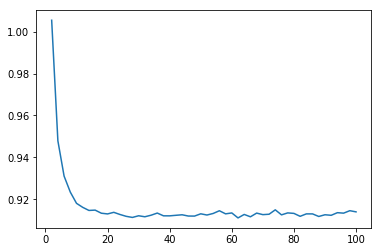

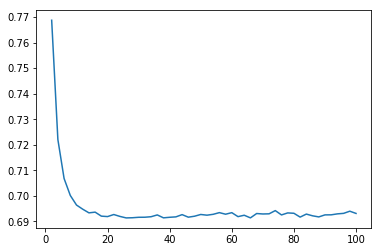

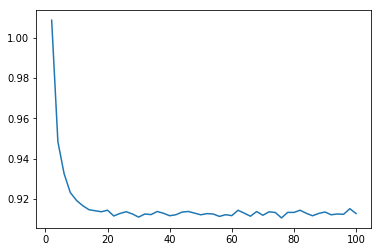

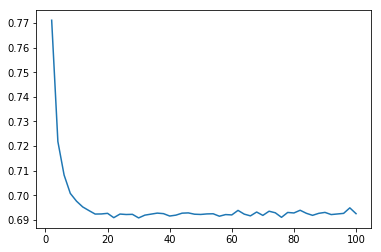

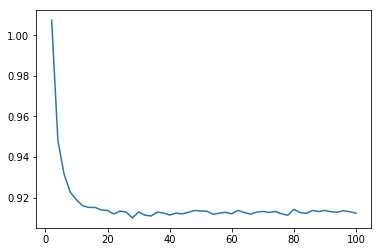

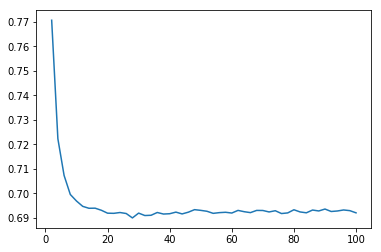

In [189]:
rmse_mae_plot(rp_d,mp_d)
rmse_mae_plot(rup_d,mup_d)
rmse_mae_plot(rhv_d,mhv_d)

## NNNMF

In [33]:
def NMF_filter(data_, range_,trimm,movie_ratings_dict,splits=10, id_var_dict=None):
    kf = KFold(n_splits=splits)
    reader = Reader(rating_scale=(1, 5))
    mae_d={}
    rmse_d={}
    for latent_factors in range_:
        print('Number of Latent Factors : ',latent_factors)
        nmf_model = NMF(n_factors = latent_factors)
        rmse_list=[]
        mae_list =[]
        for trainset, testset in kf.split(data_):
            #print(testset)
            if(trimm=='p'):
                testset = get_popular(movie_ratings_dict,testset)
            elif(trimm=='up'):
                testset = get_unpopular(movie_ratings_dict,testset)
            elif(trimm=='hv'):
                testset = get_highvar(movie_ratings_dict,id_var_dict,testset)
            nmf_model.fit(trainset)
            predictions = nmf_model.test(testset,verbose=False)
            rmse_list.append(accuracy.rmse(predictions,verbose=False))
            mae_list.append(accuracy.mae(predictions,verbose=False))
        rmse_d[latent_factors]=sum(rmse_list)/len(rmse_list)
        mae_d[latent_factors]=sum(mae_list)/len(mae_list)
        print('Mean rmse',sum(rmse_list)/len(rmse_list))
        print('Mean mae',sum(mae_list)/len(mae_list))
    return rmse_d, mae_d

### Question 17

In [21]:
reader = Reader(rating_scale=(1, 5))
total_data = Dataset.load_from_df(dataset[['userId','movieId','rating']], reader)
nmf_rmse , nmf_mae = NMF_filter(total_data, range(2,51,2),'notrim',movie_ratings_dict) #replace 8 with 2

Number of Latent Factors :  2
Mean rmse 1.17458951528
Mean mae 0.993422370031
Number of Latent Factors :  4
Mean rmse 1.06911686738
Mean mae 0.87931870503
Number of Latent Factors :  6
Mean rmse 1.00878943983
Mean mae 0.812422424179
Number of Latent Factors :  8
Mean rmse 0.977634102624
Mean mae 0.774739375782
Number of Latent Factors :  10
Mean rmse 0.958565639475
Mean mae 0.74990832908
Number of Latent Factors :  12
Mean rmse 0.947643534553
Mean mae 0.735216309199
Number of Latent Factors :  14
Mean rmse 0.939272301117
Mean mae 0.723383463221
Number of Latent Factors :  16
Mean rmse 0.938672331218
Mean mae 0.718903863296
Number of Latent Factors :  18
Mean rmse 0.939767468009
Mean mae 0.716423347984
Number of Latent Factors :  20
Mean rmse 0.939604899927
Mean mae 0.71449266527
Number of Latent Factors :  22
Mean rmse 0.941256025938
Mean mae 0.713414122917
Number of Latent Factors :  24
Mean rmse 0.944256587556
Mean mae 0.714130935112
Number of Latent Factors :  26
Mean rmse 0.9492399

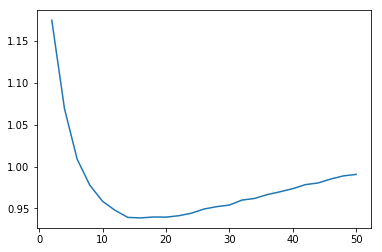

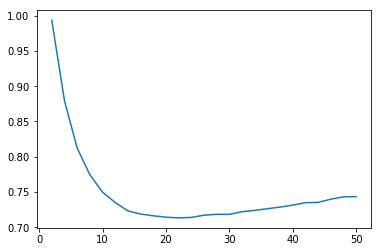

In [22]:
rmse_mae_plot(nmf_rmse,nmf_mae)

### Question 18

In [30]:
print("Minimum Average RMSE : ",min(nmf_rmse.values()))
print("Minimum Average MAE : ",min(nmf_mae.values()))
best_n_factors = [k for k,v in nmf_rmse.items() if v == min(nmf_rmse.values())]
best_n_factors_nmf = best_n_factors[0]
print("Best number of latent factors : ",best_n_factors_nmf)

Minimum Average RMSE :  0.938672331218
Minimum Average MAE :  0.713414122917
Best number of latent factors :  16


### Question 19 20 21

In [34]:
print("-----Popular Movies Testset-----")
nmf_rmse_p , nmf_mae_p = NMF_filter(total_data, range(2,51,2),'p',movie_ratings_dict) #replace 8 with 2
print("-----Unpopular Movies Testset-----")
nmf_rmse_up , nmf_mae_up = NMF_filter(total_data, range(2,51,2),'up',movie_ratings_dict) #replace 8 with 2

-----Popular Movies Testset-----
Number of Latent Factors :  2
Mean rmse 1.17620563576
Mean mae 0.995664634086
Number of Latent Factors :  4
Mean rmse 1.0655011391
Mean mae 0.875953032625
Number of Latent Factors :  6
Mean rmse 1.00628591728
Mean mae 0.811030670532
Number of Latent Factors :  8
Mean rmse 0.97046511628
Mean mae 0.76869520494
Number of Latent Factors :  10
Mean rmse 0.954263079741
Mean mae 0.74731862795
Number of Latent Factors :  12
Mean rmse 0.944149722822
Mean mae 0.731928783707
Number of Latent Factors :  14
Mean rmse 0.937386907869
Mean mae 0.721952396651
Number of Latent Factors :  16
Mean rmse 0.938239978719
Mean mae 0.718867053852
Number of Latent Factors :  18
Mean rmse 0.935422684876
Mean mae 0.713311692173
Number of Latent Factors :  20
Mean rmse 0.93693904693
Mean mae 0.712624966154
Number of Latent Factors :  22
Mean rmse 0.937236950554
Mean mae 0.710662270178
Number of Latent Factors :  24
Mean rmse 0.942181337231
Mean mae 0.712686568104
Number of Latent Fa

In [35]:
print("-----High Variance Movies Testset-----")
nmf_rmse_hv , nmf_mae_hv = NMF_filter(total_data, range(2,51,2),'hv',movie_ratings_dict,id_var_dict= id_var_dict) #replace 8 with 2

-----High Variance Movies Testset-----
Number of Latent Factors :  2
Mean rmse 1.17524785521
Mean mae 0.99457791001
Number of Latent Factors :  4
Mean rmse 1.06463957537
Mean mae 0.875618594309
Number of Latent Factors :  6
Mean rmse 1.00493901745
Mean mae 0.808577159888
Number of Latent Factors :  8
Mean rmse 0.974351271916
Mean mae 0.77214989273
Number of Latent Factors :  10
Mean rmse 0.95497561429
Mean mae 0.747836569443
Number of Latent Factors :  12
Mean rmse 0.941697699197
Mean mae 0.730767939375
Number of Latent Factors :  14
Mean rmse 0.937674115022
Mean mae 0.722550043989
Number of Latent Factors :  16
Mean rmse 0.93411333778
Mean mae 0.715526297056
Number of Latent Factors :  18
Mean rmse 0.93434724162
Mean mae 0.712338529248
Number of Latent Factors :  20
Mean rmse 0.936884390713
Mean mae 0.711415435621
Number of Latent Factors :  22
Mean rmse 0.940671676722
Mean mae 0.712480876945
Number of Latent Factors :  24
Mean rmse 0.943172035745
Mean mae 0.713654746501
Number of Lat

-----Popular Movies Testset-----


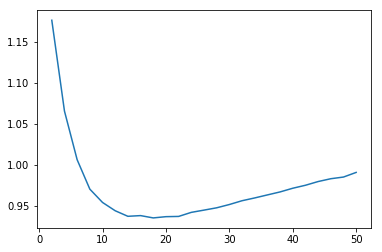

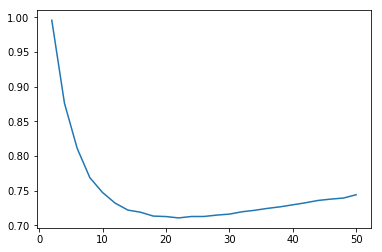

Minimum Average RMSE :  0.935422684876
Minimum Average MAE :  0.710662270178
-----Unpopular Movies Testset-----


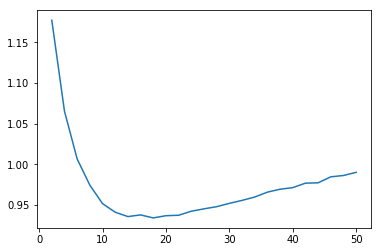

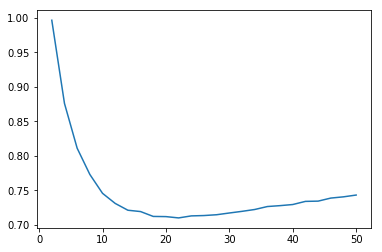

Minimum Average RMSE :  0.934251028473
Minimum Average MAE :  0.709841450406
-----High Variance Movies Testset-----


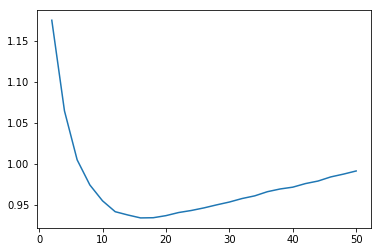

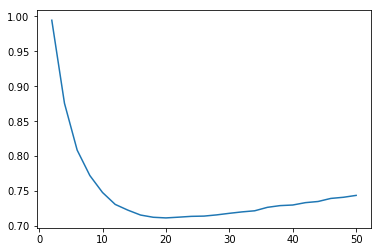

Minimum Average RMSE :  0.93411333778
Minimum Average MAE :  0.711415435621


In [36]:
print("-----Popular Movies Testset-----")
rmse_mae_plot(nmf_rmse_p,nmf_mae_p)
print("Minimum Average RMSE : ",min(nmf_rmse_p.values()))
print("Minimum Average MAE : ",min(nmf_mae_p.values()))
print("-----Unpopular Movies Testset-----")
rmse_mae_plot(nmf_rmse_up,nmf_mae_up)
print("Minimum Average RMSE : ",min(nmf_rmse_up.values()))
print("Minimum Average MAE : ",min(nmf_mae_up.values()))
print("-----High Variance Movies Testset-----")
rmse_mae_plot(nmf_rmse_hv,nmf_mae_hv)
print("Minimum Average RMSE : ",min(nmf_rmse_hv.values()))
print("Minimum Average MAE : ",min(nmf_mae_hv.values()))

### Question 22

In [17]:
def plot_roc(fpr, tpr, roc_auc, threshold_value):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for threshold value : ' + str(threshold_value))
    plt.legend(loc="lower right")
    plt.show()

In [18]:
def plot_roc_curves(testset,preds,thresholds_arr):
    for threshold_value in thresholds_arr:
        y_test = []
        y_preds = []
        for x in testset:
            if x[2] < threshold_value:
                y_test.append(0)
            else:
                y_test.append(1)
        for i in range(len(preds)):
            y_preds.append(preds[i][3])
        fpr, tpr, thresholds = roc_curve(y_test, y_preds)
        roc_auc = auc(fpr, tpr)
        plot_roc(fpr,tpr, roc_auc,threshold_value)

In [20]:
reader = Reader(rating_scale=(1, 5))
data_roc = Dataset.load_from_df(dataset[['userId','movieId','rating']], reader)
train_set, test_set = train_test_split(data_roc, test_size = 0.1, random_state = 0)
roc_nmf_model = NMF(n_factors = 16)
roc_nmf_model.fit(train_set)
preds = roc_nmf_model.test(test_set)

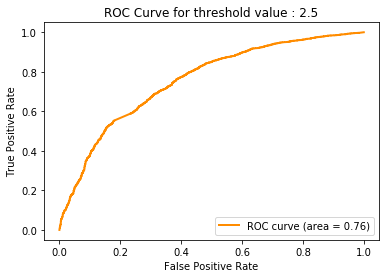

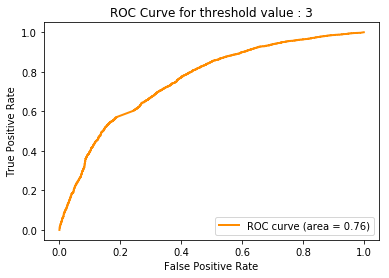

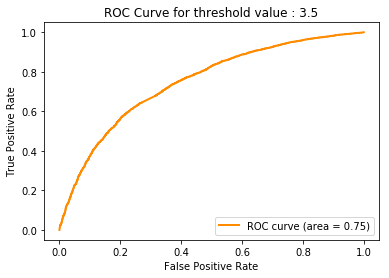

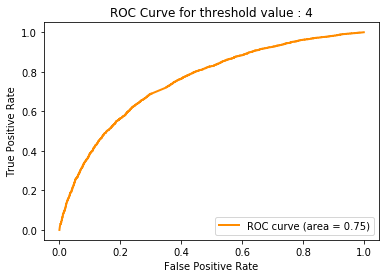

In [21]:
thresholds = [2.5,3,3.5,4]
plot_roc_curves(test_set,preds,thresholds)

### Question 23

#### TODO

## Matrix Factorization with bias

In [22]:
def SVD_filter(data_, range_,trimm,movie_ratings_dict,splits=10, id_var_dict=None):
    kf = KFold(n_splits=splits)
    reader = Reader(rating_scale=(1, 5))
    mae_d={}
    rmse_d={}
    for latent_factors in range_:
        print('Number of Latent Factors : ',latent_factors)
        svd_model = SVD(n_factors = latent_factors)
        rmse_list=[]
        mae_list =[]
        for trainset, testset in kf.split(data_):
            #print(testset)
            if(trimm=='p'):
                testset = get_popular(movie_ratings_dict,testset)
            elif(trimm=='up'):
                testset = get_unpopular(movie_ratings_dict,testset)
            elif(trimm=='hv'):
                testset = get_highvar(movie_ratings_dict, id_var_dict, testset)
            svd_model.fit(trainset)
            predictions = svd_model.test(testset,verbose=False)
            rmse_list.append(accuracy.rmse(predictions,verbose=False))
            mae_list.append(accuracy.mae(predictions,verbose=False))
        rmse_d[latent_factors]=sum(rmse_list)/len(rmse_list)
        mae_d[latent_factors]=sum(mae_list)/len(mae_list)
        print('Mean rmse',sum(rmse_list)/len(rmse_list))
        print('Mean mae',sum(mae_list)/len(mae_list))
    return rmse_d, mae_d

### Question 24

In [23]:
total_data = Dataset.load_from_df(dataset[['userId','movieId','rating']], reader)
svd_rmse , svd_mae = SVD_filter(total_data, range(2,51,2),'notrim',movie_ratings_dict)

Number of Latent Factors :  2
Mean rmse 0.887055006927
Mean mae 0.682696350095
Number of Latent Factors :  4
Mean rmse 0.887905322601
Mean mae 0.684015812634
Number of Latent Factors :  6
Mean rmse 0.887472346481
Mean mae 0.683436963945
Number of Latent Factors :  8
Mean rmse 0.887154207888
Mean mae 0.682903202238
Number of Latent Factors :  10
Mean rmse 0.887762892589
Mean mae 0.683298033806
Number of Latent Factors :  12
Mean rmse 0.887662800747
Mean mae 0.682989819585
Number of Latent Factors :  14
Mean rmse 0.888305128135
Mean mae 0.683786535219
Number of Latent Factors :  16
Mean rmse 0.88729416102
Mean mae 0.683151485532
Number of Latent Factors :  18
Mean rmse 0.887577887548
Mean mae 0.682908203401
Number of Latent Factors :  20
Mean rmse 0.888242164838
Mean mae 0.683247975606
Number of Latent Factors :  22
Mean rmse 0.887835974432
Mean mae 0.683056343173
Number of Latent Factors :  24
Mean rmse 0.887485519618
Mean mae 0.683065162293
Number of Latent Factors :  26
Mean rmse 0.88

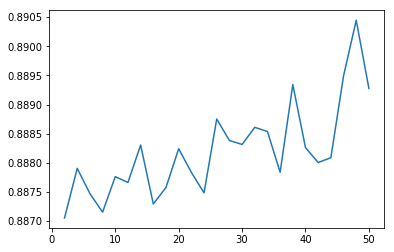

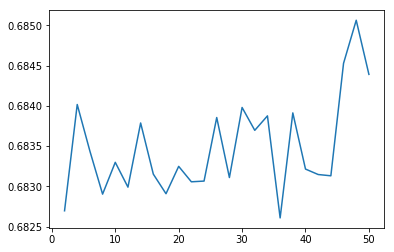

In [24]:
rmse_mae_plot(svd_rmse,svd_mae)

### Question 25

In [25]:
print("Minimum Average RMSE : ",min(svd_rmse.values()))
print("Minimum Average MAE : ",min(svd_mae.values()))
best_n_factors = [k for k,v in svd_rmse.items() if v == min(svd_rmse.values())]
best_n_factors_svd = best_n_factors[0]
print("Best number of latent factors : ",best_n_factors_svd)

Minimum Average RMSE :  0.887055006927
Minimum Average MAE :  0.68260789484
Best number of latent factors :  2


### Question 26,27,28

In [26]:
print("-----Popular Movies Testset-----")
svd_rmse_p , svd_mae_p = SVD_filter(total_data, range(2,51,2),'p',movie_ratings_dict) 

-----Popular Movies Testset-----
Number of Latent Factors :  2
Mean rmse 0.887032973496
Mean mae 0.68280303929
Number of Latent Factors :  4
Mean rmse 0.886925732319
Mean mae 0.682672119627
Number of Latent Factors :  6
Mean rmse 0.887042334276
Mean mae 0.682690079836
Number of Latent Factors :  8
Mean rmse 0.887603543034
Mean mae 0.683338165052
Number of Latent Factors :  10
Mean rmse 0.88708477541
Mean mae 0.682493215201
Number of Latent Factors :  12
Mean rmse 0.887301819787
Mean mae 0.68304066378
Number of Latent Factors :  14
Mean rmse 0.888098156358
Mean mae 0.683334357058
Number of Latent Factors :  16
Mean rmse 0.886889180875
Mean mae 0.681941569641
Number of Latent Factors :  18
Mean rmse 0.886502795753
Mean mae 0.681883052631
Number of Latent Factors :  20
Mean rmse 0.886749488755
Mean mae 0.682046131338
Number of Latent Factors :  22
Mean rmse 0.887240946245
Mean mae 0.682271332923
Number of Latent Factors :  24
Mean rmse 0.887591813515
Mean mae 0.68240262772
Number of Laten

In [27]:
print("-----Unpopular Movies Testset-----")
svd_rmse_up , svd_mae_up = SVD_filter(total_data, range(2,51,2),'up',movie_ratings_dict) 

-----Unpopular Movies Testset-----
Number of Latent Factors :  2
Mean rmse 0.886841497638
Mean mae 0.682941401192
Number of Latent Factors :  4
Mean rmse 0.886790058502
Mean mae 0.682409075152
Number of Latent Factors :  6
Mean rmse 0.886699279883
Mean mae 0.682668381436
Number of Latent Factors :  8
Mean rmse 0.88732232878
Mean mae 0.682887702843
Number of Latent Factors :  10
Mean rmse 0.886535951271
Mean mae 0.68224427832
Number of Latent Factors :  12
Mean rmse 0.886316387772
Mean mae 0.6821786827
Number of Latent Factors :  14
Mean rmse 0.887512829642
Mean mae 0.682560990071
Number of Latent Factors :  16
Mean rmse 0.886891810831
Mean mae 0.682415793807
Number of Latent Factors :  18
Mean rmse 0.887169595438
Mean mae 0.682751311602
Number of Latent Factors :  20
Mean rmse 0.888127968619
Mean mae 0.683501784625
Number of Latent Factors :  22
Mean rmse 0.888521491215
Mean mae 0.683225390675
Number of Latent Factors :  24
Mean rmse 0.888169720608
Mean mae 0.682709593854
Number of Lat

In [29]:
print("-----High Variance Movies Testset-----")
svd_rmse_hv , svd_mae_hv = SVD_filter(total_data, range(2,51,2),'hv',movie_ratings_dict, id_var_dict=id_var_dict)

-----High Variance Movies Testset-----
Number of Latent Factors :  2
Mean rmse 0.886965056096
Mean mae 0.682328255808
Number of Latent Factors :  4
Mean rmse 0.887478646025
Mean mae 0.682744471352
Number of Latent Factors :  6
Mean rmse 0.887350900067
Mean mae 0.682998846345
Number of Latent Factors :  8
Mean rmse 0.887333543696
Mean mae 0.682469255335
Number of Latent Factors :  10
Mean rmse 0.887424234833
Mean mae 0.683212511156
Number of Latent Factors :  12
Mean rmse 0.886466238502
Mean mae 0.682749288319
Number of Latent Factors :  14
Mean rmse 0.887577052775
Mean mae 0.683225751876
Number of Latent Factors :  16
Mean rmse 0.887229775419
Mean mae 0.682342911334
Number of Latent Factors :  18
Mean rmse 0.886915829186
Mean mae 0.682482166545
Number of Latent Factors :  20
Mean rmse 0.887245835605
Mean mae 0.682213770828
Number of Latent Factors :  22
Mean rmse 0.887828571366
Mean mae 0.683195062561
Number of Latent Factors :  24
Mean rmse 0.886496838035
Mean mae 0.682150498325
Numbe

-----Popular Movies Testset-----


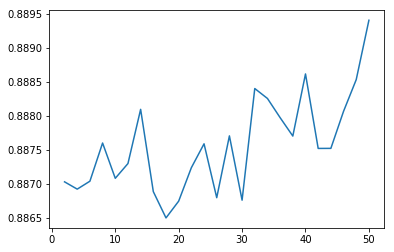

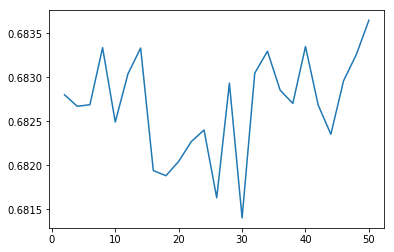

Minimum Average RMSE :  0.886502795753
Minimum Average MAE :  0.681403317891
-----Unpopular Movies Testset-----


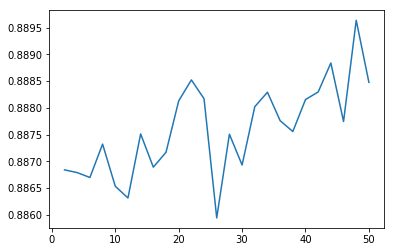

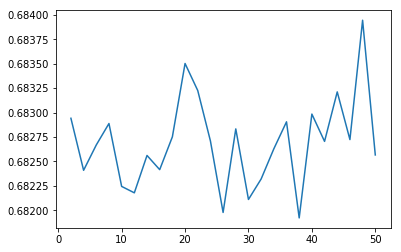

Minimum Average RMSE :  0.885944199889
Minimum Average MAE :  0.68192198099
-----High Variance Movies Testset-----


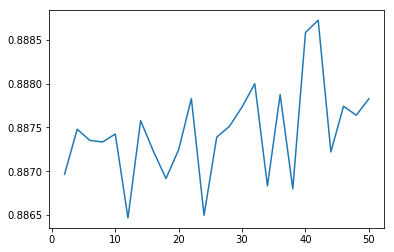

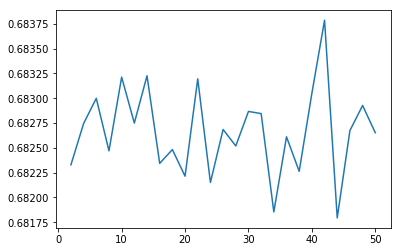

Minimum Average RMSE :  0.886466238502
Minimum Average MAE :  0.681793150457


In [30]:
print("-----Popular Movies Testset-----")
rmse_mae_plot(svd_rmse_p,svd_mae_p)
print("Minimum Average RMSE : ",min(svd_rmse_p.values()))
print("Minimum Average MAE : ",min(svd_mae_p.values()))
print("-----Unpopular Movies Testset-----")
rmse_mae_plot(svd_rmse_up,svd_mae_up)
print("Minimum Average RMSE : ",min(svd_rmse_up.values()))
print("Minimum Average MAE : ",min(svd_mae_up.values()))
print("-----High Variance Movies Testset-----")
rmse_mae_plot(svd_rmse_hv,svd_mae_hv)
print("Minimum Average RMSE : ",min(svd_rmse_hv.values()))
print("Minimum Average MAE : ",min(svd_mae_hv.values()))

### Question 29

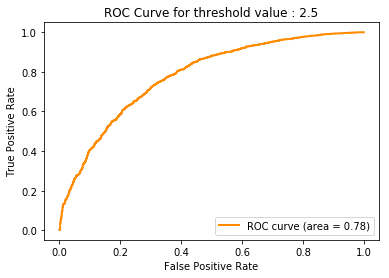

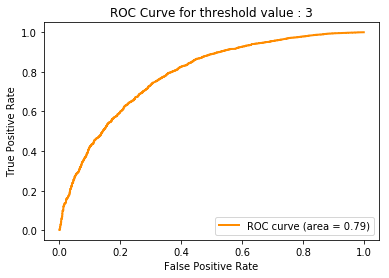

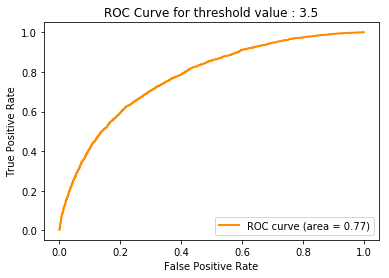

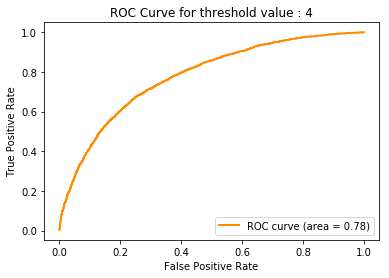

In [31]:
data_roc = Dataset.load_from_df(dataset[['userId','movieId','rating']], reader)
train_set, test_set = train_test_split(data_roc, test_size = 0.1, random_state = 0)
roc_svd_model = SVD(n_factors = best_n_factors_svd)
roc_svd_model.fit(train_set)
preds = roc_svd_model.test(test_set)
thresholds = [2.5,3,3.5,4]
plot_roc_curves(test_set,preds,thresholds)

## Naive Collaborative filtering

In [34]:
from sklearn.model_selection import KFold

In [2]:
# Function that returns mean rating of the user
def mean_rating(user):
    user_dataset = dataset.loc[dataset['userId'] == user]
    l = len(user_dataset)
    rating_sum = np.sum(user_dataset['rating'])
    return rating_sum/l

In [23]:
mean_rating(1)

2.5499999999999998

In [37]:
def get_popular_dataset(testset):
    popular_movieids = [x[0] for x in movie_ratings_dict.items() if x[1]>2]
    popular_movie_dataset = dataset.loc[dataset['movieId'].isin(popular_movieids)]
    return popular_movie_dataset

def get_unpopular_dataset(testset):
    unpopular_movieids = [x[0] for x in movie_ratings_dict.items() if x[1]<=2]
    unpopular_movie_dataset = dataset.loc[dataset['movieId'].isin(unpopular_movieids)]
    return unpopular_movie_dataset

def get_highvar_dataset(testset):
    high_variance_movieids = [x[0] for x in movie_ratings_dict.items() if x[1]>=5]
    high_variance_movieids = [x for x in high_variance_movieids if id_var_dict[x]>=2 ]
    highvar_movie_dataset = dataset.loc[dataset['movieId'].isin(high_variance_movieids)]
    return highvar_movie_dataset

In [24]:
def rmse(preds, true_vals):
    change = preds-true_vals
    rms = np.sqrt(np.sum(c*c for c in change))
    return rms/len(preds)

In [31]:
def naive_cf(df, subset):
    error = []
    for i in range(10):
        kf = KFold(n_splits = 10, shuffle = True, random_state = 2)
        result = next(kf.split(df), None)
        train = df.iloc[result[0]]
        test =  df.iloc[result[1]]
        if subset == 'entire':
            test2 = test
        if subset == 'popular':
            test2 = get_popular_dataset(test)
        if subset == 'unpopular':
            test2 = get_unpopular_dataset(test)
        if subset == 'highvar':
            test2 = get_highvar_dataset(test)
        predictions = [mean_rating(i) for i in test2['userId']]
        error.append(rmse(predictions, test2['rating']))
    print("RMSE 10-fold cross validation: ", np.sum(error)/10)

In [35]:
# Question 30
print("Entire dataset")
naive_cf(dataset, "entire")

Entire dataset
RMSE 10-fold cross validation:  0.00945855717302


In [38]:
# Question 31
print("Popular movie dataset")
naive_cf(dataset, "popular")

Popular movie dataset
RMSE 10-fold cross validation:  0.00309672353362


In [39]:
# Question 32
print("Unpopular movie dataset")
naive_cf(dataset, "unpopular")

Unpopular movie dataset
RMSE 10-fold cross validation:  0.0136684295982


In [40]:
# Question 33
print("High variance movie dataset")
naive_cf(dataset, "highvar")

High variance movie dataset
RMSE 10-fold cross validation:  0.0485738386232


In [ ]:
# Question 34 
# TODO
def plot_roc_combined(testset,preds,threshold_value):
    y_test = []
    y_preds = []
    for x in testset:
        if x[2] < threshold_value:
            y_test.append(0)
        else:
            y_test.append(1)
    for i in range(len(preds)):
        y_preds.append(preds[i][3])
        
    fpr, tpr, thresholds = roc_curve(y_test, y_preds)
    roc_auc = auc(fpr, tpr)
    #plot_roc(fpr,tpr, roc_auc,threshold_value)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for threshold value : ' + str(threshold_value))
    plt.legend(loc="lower right")
    plt.show()

In [70]:
user_ids = dataset['userId'].unique()

In [46]:
user_movie_rating = dataset[['userId', 'movieId', 'rating']].fillna(0)

In [44]:
dataset.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [139]:
user_movie_rating_new = user_movie_rating[user_movie_rating.rating > 3]   # threshold for ground truth values = 3

In [177]:
user_movie_rating_new['movieId'].nunique()

6993

In [171]:
user_movies_dict = {}  # ground truth values for users
for uid in user_ids:
    df = user_movie_rating_new[user_movie_rating_new.userId == uid]
    if uid in user_movies_dict:
        user_movies_dict[uid].append(df.movieId)
    else:
        user_movies_dict[uid] = df.movieId

In [172]:
user_movies_dict = {k: v for k, v in user_movies_dict.items() if len(v) != 0}  # removes users with 0 ratings

In [87]:
def getPrecision(recommendations, uid, user_movies_dict=user_movies_dict):
    rec_common = [x for x in recommendations if x in user_movies_dict[uid]]
    precision = float(len(rec_common)/len(recommendations))
    return precision

def getRecall(recommendations, uid, user_movies_dict=user_movies_dict):
    rec_common = [x for x in recommendations if x in user_movies_dict[uid]]
    recall = float(len(rec_common)/len(user_movies_dict[uid]))
    return recall

In [197]:
from collections import defaultdict

from surprise import SVD
from surprise import Dataset


def get_top_n(predictions, n=10):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

def getS_KNN(trainset, testset, t):
    sim_options = {'name': 'pearson_baseline'}
    algo = KNNWithMeans(k=20, sim_options=sim_options)   # k = 20 (from Q11)
    algo.fit(trainset)
    # Than predict ratings for all pairs (u, i) that are NOT in the training set.
    predictions = algo.test(testset)
    top_n = get_top_n(predictions, n=t)
    
    S = {}
    # Recommended items for each user
    for uid, user_ratings in top_n.items():
        S[uid] = [iid for (iid, _) in user_ratings]
    return S

def getS_NNMF(trainset, testset, t):
    algo = NMF(n_factors = 16)     # Best number . of latent factors = 16
    algo.fit(trainset)
    # Than predict ratings for all pairs (u, i) that are NOT in the training set.
    predictions = algo.test(testset)
    top_n = get_top_n(predictions, n=t)
    
    S = {}
    # Recommended items for each user
    for uid, user_ratings in top_n.items():
        S[uid] = [iid for (iid, _) in user_ratings]
    return S

def getS_MF(trainset, testset, t):
    algo = SVD(n_factors = 2)   # Best number of latent factors = 2
    algo.fit(trainset)
    # Than predict ratings for all pairs (u, i) that are NOT in the training set.
    predictions = algo.test(testset)
    top_n = get_top_n(predictions, n=t)
    
    S = {}
    # Recommended items for each user
    for uid, user_ratings in top_n.items():
        S[uid] = [iid for (iid, _) in user_ratings]
    return S

In [198]:
from surprise.model_selection import KFold

def precision_recall(tvals, algo):
    avg_precision_t = []
    avg_recall_t = []
    reader = Reader(rating_scale=(1, 5))
    data = Dataset.load_from_df(user_movie_rating_new[['userId','movieId','rating']], reader)
    kf = KFold(n_splits=10)
    for t in tvals:
        precisions = []
        recalls = []
        for trainset, testset in kf.split(data):
            user_precisions = []
            user_recalls = []
            if algo == 'knn':
                S = getS_KNN(trainset, testset, t)
            if algo == 'nnmf':
                S = getS_NNMF(trainset, testset, t)
            if algo == 'mf':
                S = getS_MF(trainset, testset, t)
            
            uids = [x[0] for x in testset]
            for uid in uids:
                user_precisions.append(getPrecision(S[uid], uid))
                user_recalls.append(getRecall(S[uid], uid))
            
            fold_precision = sum(user_precisions)/len(user_precisions)
            fold_recall = sum(user_recalls)/len(user_recalls)
            precisions.append(fold_precision)
            recalls.append(fold_recall)
        precision_t = sum(precisions)/len(precisions)
        recall_t = sum(recalls)/len(recalls)
        avg_precision_t.append(precision_t)
        avg_recall_t.append(recall_t)
    return avg_precision_t, avg_recall_t

In [201]:
def plot_func(x, y, xlabel, ylabel, title):
    plt.figure()
    plt.plot(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [199]:
tvals = range(1,25,1)

In [200]:
precision_knn, recall_knn = precision_recall(tvals, "knn")

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computi

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

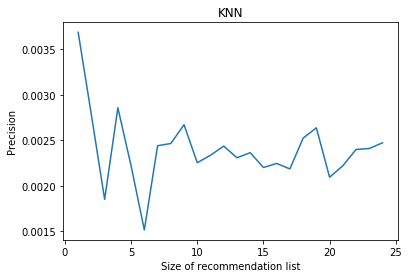

In [202]:
plot_func(tvals, precision_knn, "Size of recommendation list", "Precision", "KNN")

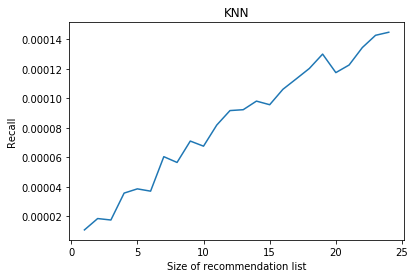

In [203]:
plot_func(tvals, recall_knn, "Size of recommendation list", "Recall", "KNN")

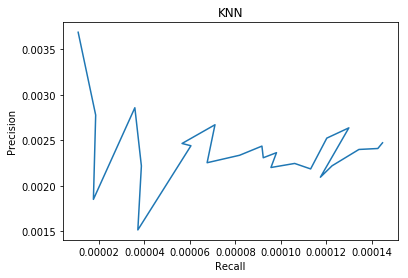

In [204]:
plot_func(recall_knn, precision_knn, "Recall", "Precision", "KNN")

In [209]:
precision_nnmf, recall_nnmf = precision_recall(tvals, "nnmf")

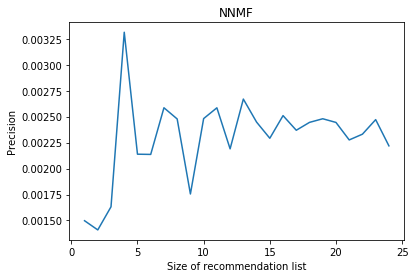

In [210]:
plot_func(tvals, precision_nnmf, "Size of recommendation list", "Precision", "NNMF")

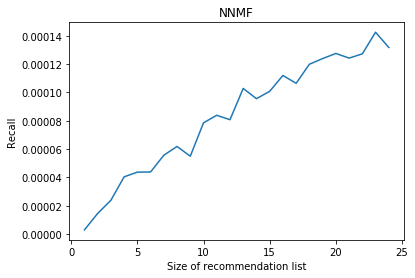

In [211]:
plot_func(tvals, recall_nnmf, "Size of recommendation list", "Recall", "NNMF")

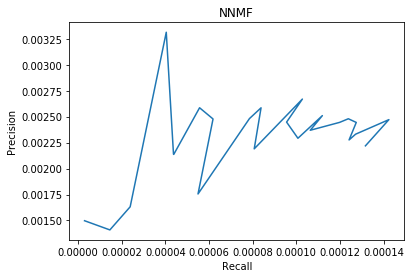

In [212]:
plot_func(recall_nnmf, precision_nnmf, "Recall", "Precision", "NNMF")

In [205]:
precision_mf, recall_mf = precision_recall(tvals, "mf")

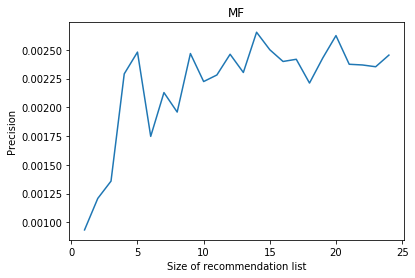

In [206]:
plot_func(tvals, precision_mf, "Size of recommendation list", "Precision", "MF")

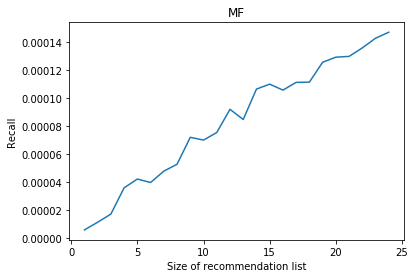

In [207]:
plot_func(tvals, recall_mf, "Size of recommendation list", "Recall", "MF")

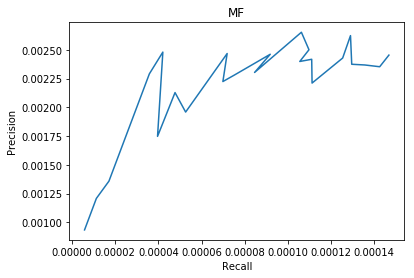

In [208]:
plot_func(recall_mf, precision_mf, "Recall", "Precision", "MF")